In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from tensor_svd_denoise import scree_plots, tensor_svd_denoise, weighted_tensor
import time
import hyperspy.api as hs

In [2]:
# read in the dark reference
path = '/srv/home/chenyu/Service/EELS/'
s = hs.load(path + "23_DARK_YBCO_20nm_16us_SI_100x100_30ms_dark.dm3.dm3")
data_ref = np.asarray(s)
print(data_ref.shape)

(100, 100, 1340)


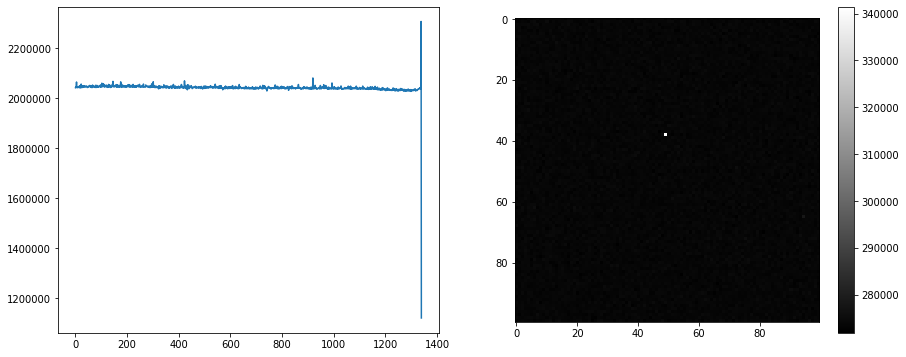

In [3]:
# Visulize to check the dark refernece
fig = plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(np.sum(np.sum(data_ref,axis=0),axis=0))
plt.subplot(122)
plt.imshow(np.sum(data_ref,axis=2))
# plt.clim([300000,450000])
plt.colorbar()

In [4]:
# read in the dark reference
path = '/srv/home/chenyu/Service/EELS/'
s = hs.load(path + "13_YBCO_15nm_16us_SI_159x70_30ms.dm3.dm3")
data = np.asarray(s)
print(data.shape)

(70, 159, 1340)


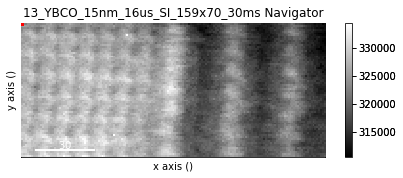

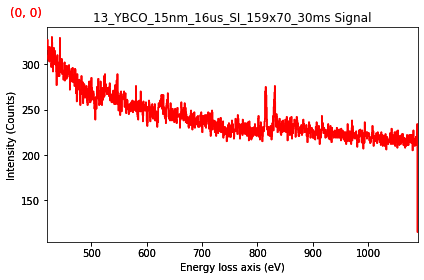

In [5]:
s.plot()

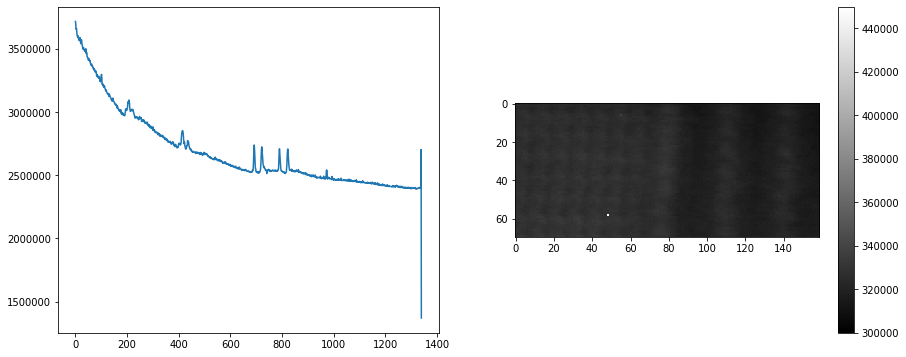

In [6]:
# Visulize to check the dark refernece
fig = plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(np.sum(np.sum(data,axis=0),axis=0))
plt.subplot(122)
plt.imshow(np.sum(data,axis=2))
plt.clim([300000,450000])
plt.colorbar()

In [7]:
# extract the averaged dark reference from the whole spectrum
dark_mean = np.mean(np.mean(data_ref, axis=0),axis=0)
temp = data - dark_mean

In [41]:
temp.shape
s = hs.signals.Signal1D(temp.reshape(70*159,1340))
s.T

<Signal1D, title: , dimensions: (1340|11130)>

In [49]:
# Case 3: apply conventional PCA from hyperspy to the data with dark reference subtracted
s = hs.signals.Signal1D(temp.reshape(70*159,1340))
s
s.decomposition()
sc = s.get_decomposition_model(4)

In [50]:
sc_data = np.asarray(sc)
sc_data = sc_data.reshape(70,159,1340)

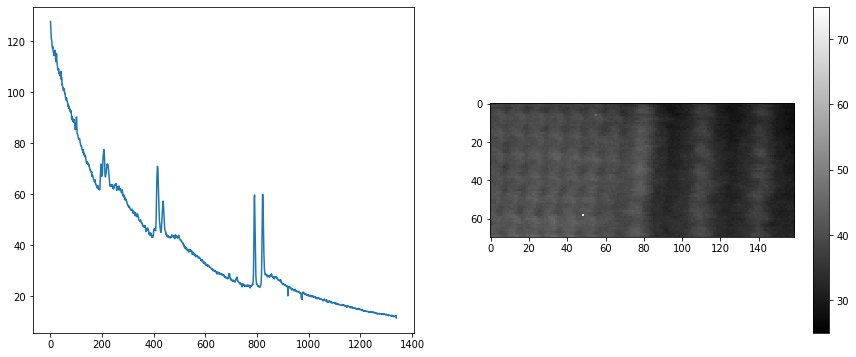

In [51]:
# Visulize the data with dark reference removed
fig = plt.figure(figsize=(15,6))
plt.subplot(121)
# plt.plot(np.mean(np.mean(temp,axis=0),axis=0))
plt.plot(sc_data[15,10,:])
plt.subplot(122)
plt.imshow(np.mean(sc_data,axis=2))
plt.clim([25,75])
plt.colorbar()

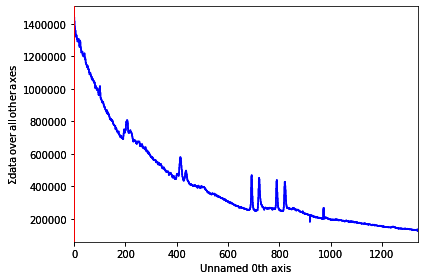

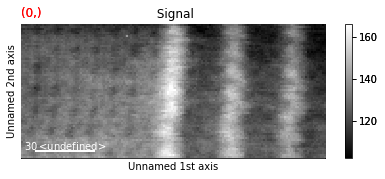

In [52]:
temp2 = sc_data.astype('float32')
temp2 = np.transpose(temp2,[2,0,1])
s_denoised = hs.signals.Signal2D(temp2)
s_denoised.plot()
s_denoised.save(path+'EELS_PCA_denoised_4comp.tif')

In [37]:
# Case 2: load the data with dark reference and background removed in CSI
from skimage import io
im = io.imread(path + '13_YBCO_PowerLaw_Oxygen.tif')
temp = np.transpose(im,[1,2,0])
print(temp.shape)

(70, 159, 1340)


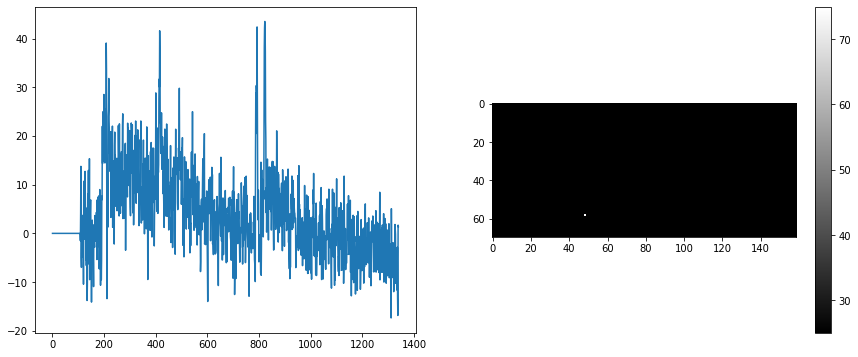

In [44]:
# Visulize the data with dark reference removed
fig = plt.figure(figsize=(15,6))
plt.subplot(121)
# plt.plot(np.mean(np.mean(temp,axis=0),axis=0))
plt.plot(temp[15,10,:])
plt.subplot(122)
plt.imshow(np.mean(temp,axis=2))
plt.clim([25,75])
plt.colorbar()

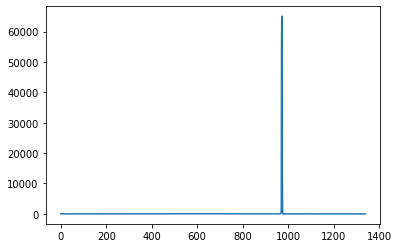

In [39]:
# One of the spectrums is a bad point
plt.plot(temp[58,48,:])

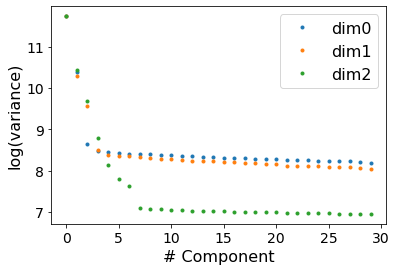

In [40]:
# Determine denoising ranks
ndim = [100,100,100]
scree = scree_plots(temp,ndim)

# Plot the first 30 components along each dimension in log scale

for i in range(len(scree)):
    plt.plot(np.log(scree[i][0:30]),'.',linewidth = 4, label = 'dim' + str(i))
plt.legend(fontsize=16)
plt.xlabel('# Component', fontsize=16)
plt.ylabel('log(variance)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [41]:
rank = [15,15,10]
# Unweighting the tensor SVD denoised data.
# data_weighted, weights = weighted_tensor(temp)
# data_weighted_denoised = tensor_svd_denoise(data_weighted, rank)
# data_weighted_denoised = np.multiply(data_weighted_denoised, 1/weights)
data_denoised = tensor_svd_denoise(temp, rank)
print('SVD finished.')

SVD finished.


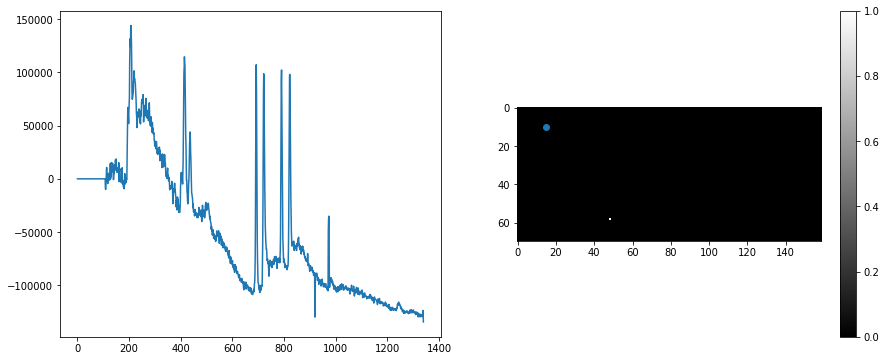

In [43]:
# Visulize the data with dark reference removed
irow = 15
icol = 10

fig = plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(data_denoised[irow,icol,:])
# plt.plot(np.sum(np.sum(data_denoised,axis=0),axis=0))
plt.subplot(122)
plt.imshow(np.mean(data_denoised,axis=2))
plt.clim([25,75])
plt.scatter(irow,icol)
plt.colorbar()

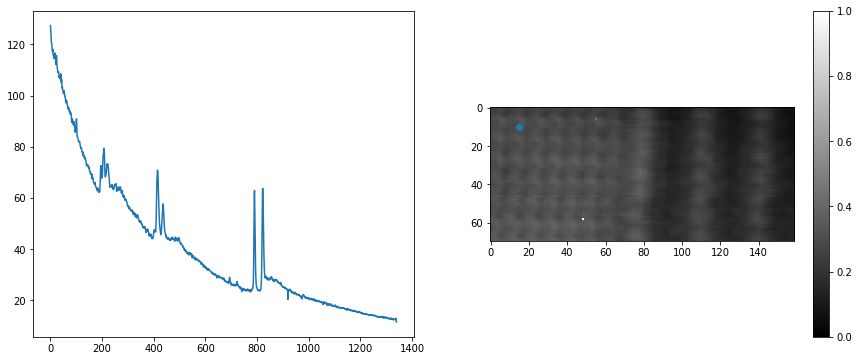

In [10]:
# Visulize the denoised data with weighting option
irow = 15
icol = 10

fig = plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(data_weighted_denoised[irow,icol,:])
plt.subplot(122)
plt.imshow(np.mean(data_weighted_denoised,axis=2))
plt.clim([25,75])
plt.scatter(irow,icol)
plt.colorbar()

In [34]:
temp = np.transpose(data_denoised,[2,0,1])

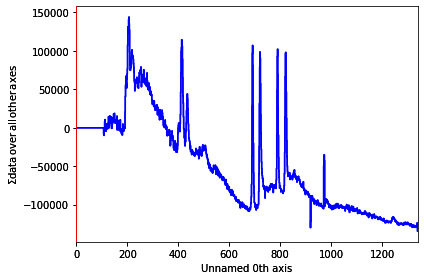

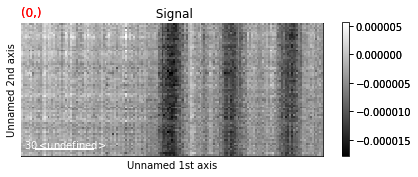

In [35]:
s_denoised = hs.signals.Signal2D(temp)
s_denoised.plot()

In [36]:
s_denoised.save(path+'EELS_denoised_bgsubtracted.tif')

Overwrite '/srv/home/chenyu/Service/EELS/EELS_denoised_weighted_15-15-10.tif' (y/n)?
y


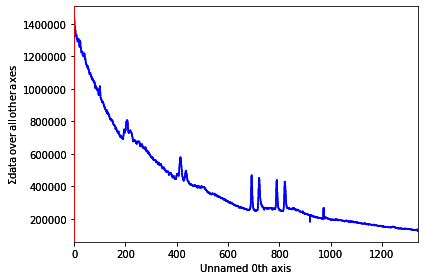

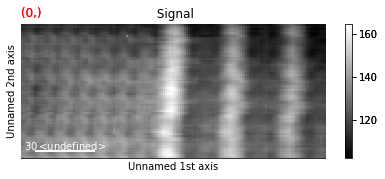

In [14]:
temp2 = data_weighted_denoised.astype('float32')
temp2 = np.transpose(temp2,[2,0,1])
s_denoised = hs.signals.Signal2D(temp2)
s_denoised.plot()
s_denoised.save(path+'EELS_denoised_weighted_15-15-10.tif')